## Credit Risk Assessment

#### The task is to predict the creditworthiness of individuals or businesses based on financial and demographic information

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.datasets import fetch_openml

import warnings
import pickle as pk
warnings.filterwarnings('ignore') 
sns.set(rc={'figure.figsize':(11,8)})

pd.options.display.float_format = '{:.2f}'.format

### 1. Import dataset 

In [2]:
df = pd.read_csv('german_credit_data.csv', usecols=range(1, 11))
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


### 2. EDA

### 2.1 Distributions and Visualizations

#### 2.1.1 Distribution of target variable

<Axes: xlabel='Risk', ylabel='count'>

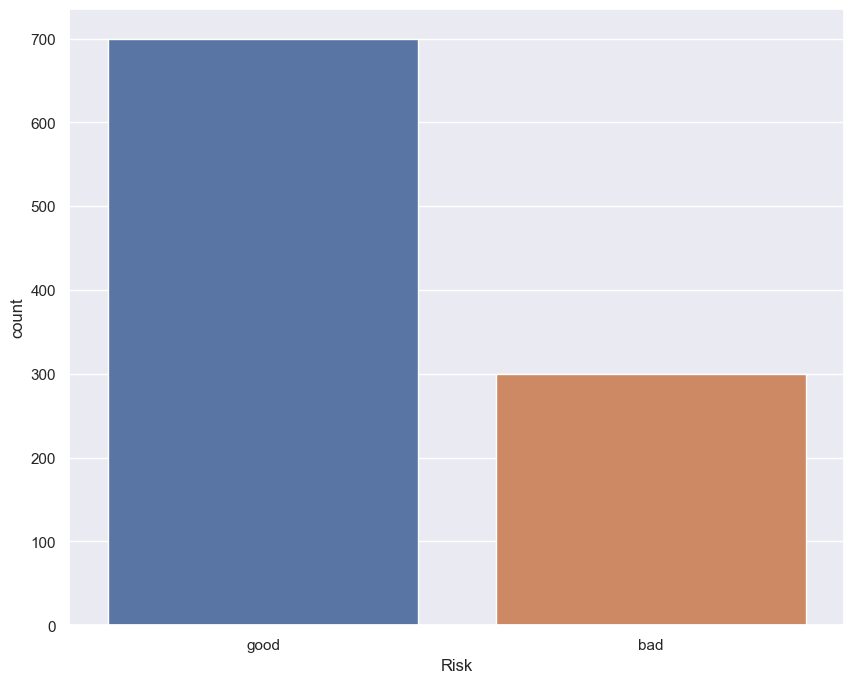

In [3]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.countplot(x='Risk', data=df)

In [4]:
num_cols = df._get_numeric_data().columns
cat_cols = df.columns.difference(num_cols)
cat_cols

Index(['Checking account', 'Housing', 'Purpose', 'Risk', 'Saving accounts',
       'Sex'],
      dtype='object')

#### 2.1.2 Distribution of numerical features

<Axes: xlabel='Credit amount', ylabel='Count'>

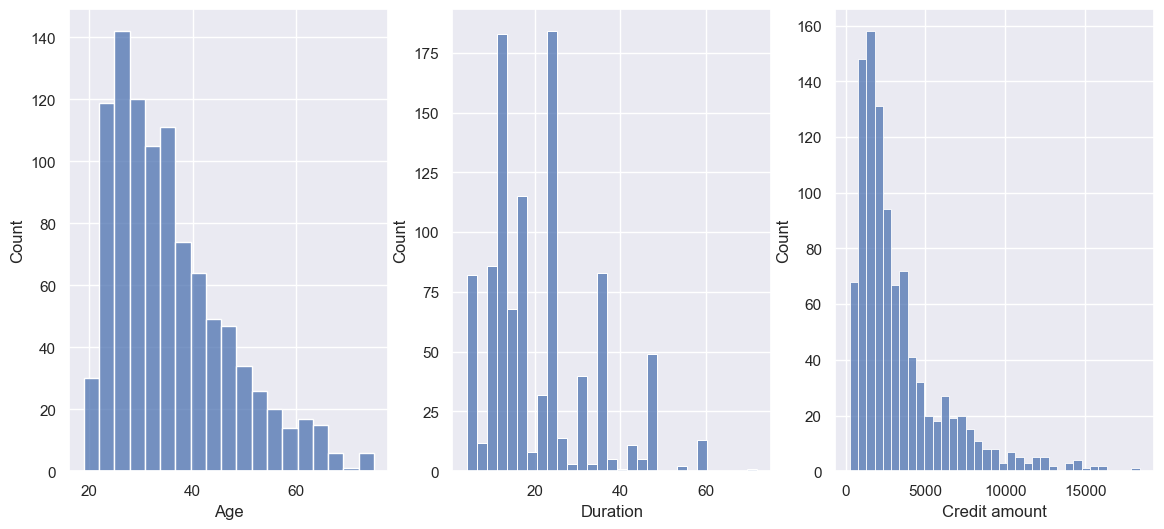

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(14, 6))

#Plot for checking the distribution of the Age feature
sns.histplot(df['Age'], ax = axes[0])

#Plot for checking the distribution of the Duration feature
sns.histplot(df['Duration'], ax = axes[1])

#Plot for checking the distribution of the Credit feature
sns.histplot(df['Credit amount'], ax = axes[2])

#### 2.1.3 Distribution of categorical features vs target

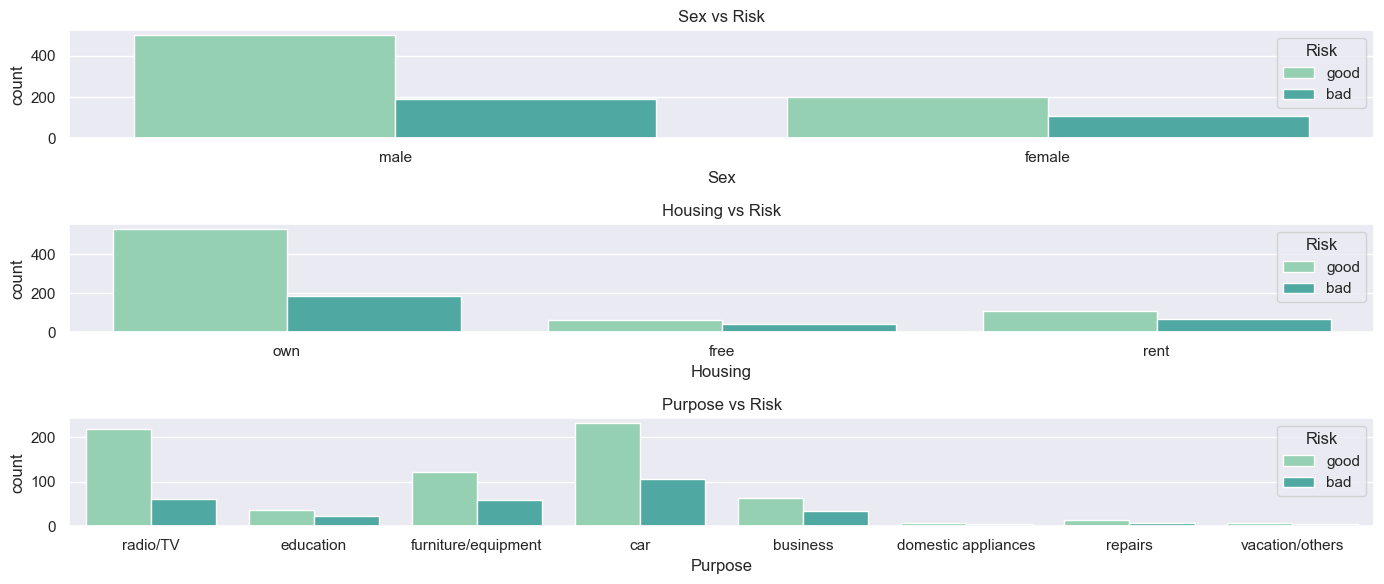

In [13]:
fig, axes = plt.subplots(3, 1, figsize=(14, 6))
sns.set_palette('mako_r')

#Plot for employment vs target
sns.countplot(x='Sex', hue='Risk', data=df, ax = axes[0])
axes[0].set_title('Sex vs Risk')

#Plot for housing vs target
sns.countplot(x='Housing', hue='Risk', data=df, ax = axes[1])
axes[1].set_title('Housing vs Risk')

#Plot for foreign worker vs target
sns.countplot(x='Purpose', hue='Risk', data=df, ax = axes[2])
axes[2].set_title('Purpose vs Risk')

plt.tight_layout()

Text(0.5, 1.0, 'Saving accounts vs Risk')

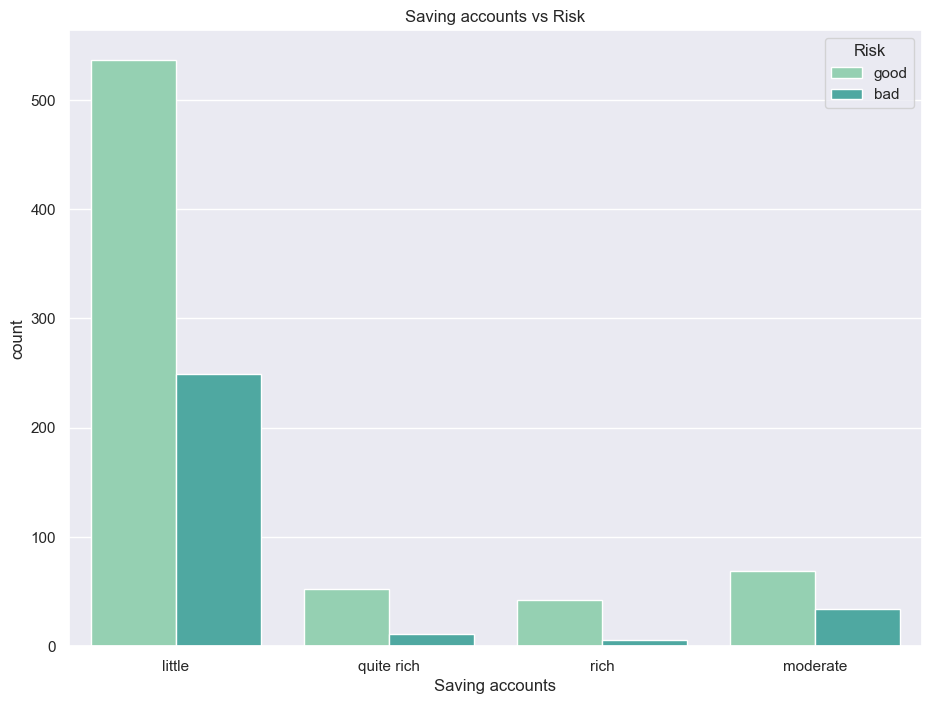

In [15]:
#Plot for Saving account vs Risk
sns.countplot(x='Saving accounts', hue='Risk', data=df)
plt.title('Saving accounts vs Risk')


Text(0.5, 1.0, 'Checking account vs Risk')

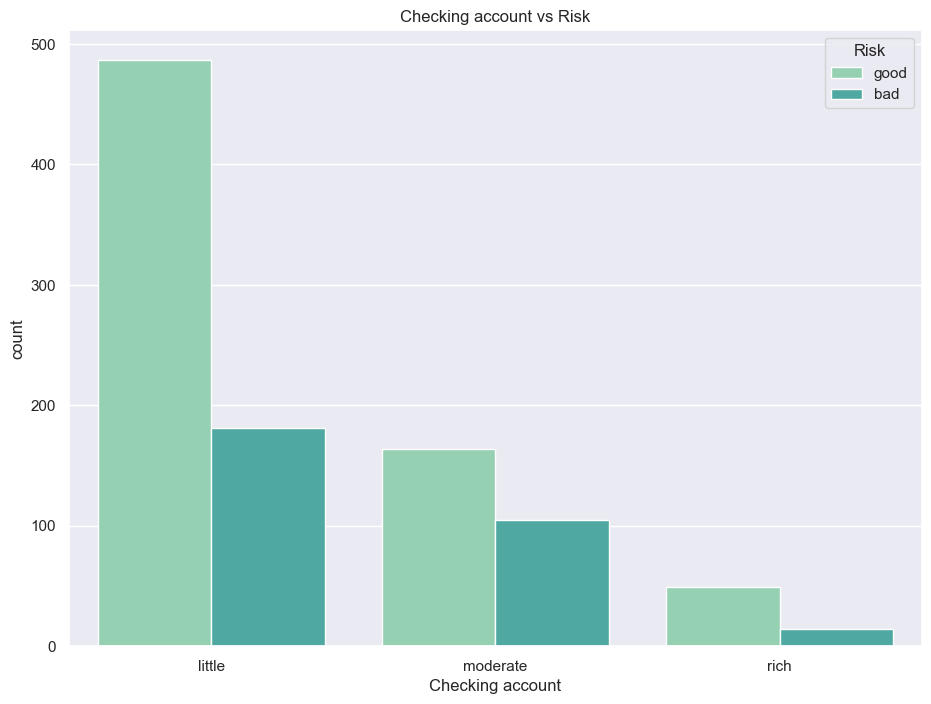

In [17]:
#Plot for Checking account vs Risk
sns.countplot(x='Checking account', hue='Risk', data=df)
plt.title('Checking account vs Risk')


### 2.2 Missing values

In [7]:
# check for missing values
missing_values = df.isna().sum()
missing_values[missing_values != 0]

Saving accounts     183
Checking account    394
dtype: int64

Since the missing values are categorical type, imputing using most-frequent values technique would result in not much loss of useful data 

In [8]:
freq_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    
def impute_by_frequent(col_name):
    df[col_name] = freq_imputer.fit_transform(df[col_name].values.reshape(-1,1)).ravel()

In [9]:
impute_cols = ['Saving accounts', 'Checking account']

for col in impute_cols:
    impute_by_frequent(col)

In [10]:
# check for missing values
missing_values = df.isna().sum()
missing_values[missing_values != 0]

Series([], dtype: int64)

In [11]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.00,1000.00,1000.00,1000.00
mean,35.55,1.90,3271.26,20.90
std,11.38,0.65,2822.74,12.06
min,19.00,0.00,250.00,4.00
25%,27.00,2.00,1365.50,12.00
50%,33.00,2.00,2319.50,18.00
75%,42.00,2.00,3972.25,24.00
max,75.00,3.00,18424.00,72.00


### 2.3 Encoding categorical feature values